# Homework 3 

# Задача №1 - Лес или пустыня?

Часто при анализе изображений местности необходимо понять ее характер. В частности, если определить, что на изображении преобладет вода, то имеет смысл искать корабли на таком изображении. Если на картинке густой лес, то, возможно, это не лучшая зона для посадки дрона или беспилотника.

Ваша задача - написать программу, которая будет отличать лес от пустыни. В приложении можно найти реальные спутниковые снимки лесов и пустынь.

Примеры изображений:
<table><tr>
    <td> <img src="https://i.ibb.co/nmHHctW/test_image_00.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/dM77C4b/test_image_06.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

test_image_00.jpg


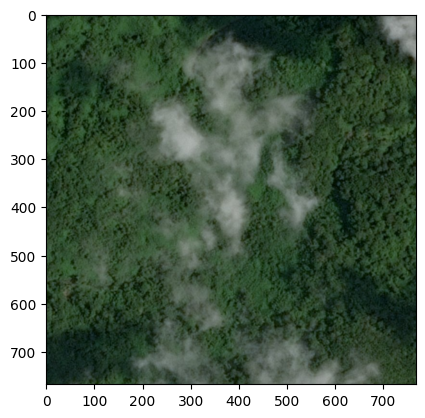

detected:	 FOREST



test_image_01.jpg


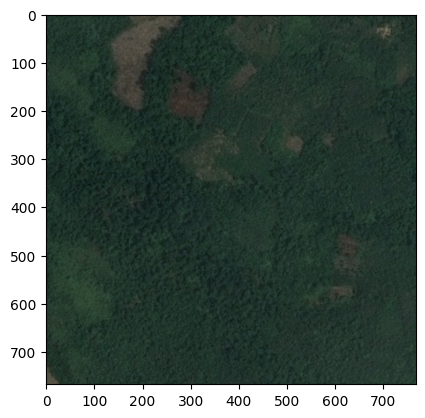

detected:	 FOREST



test_image_02.jpg


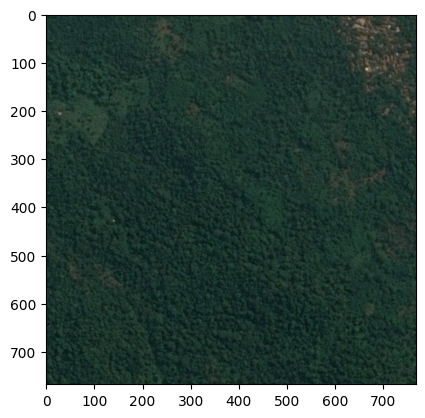

detected:	 FOREST



test_image_03.jpg


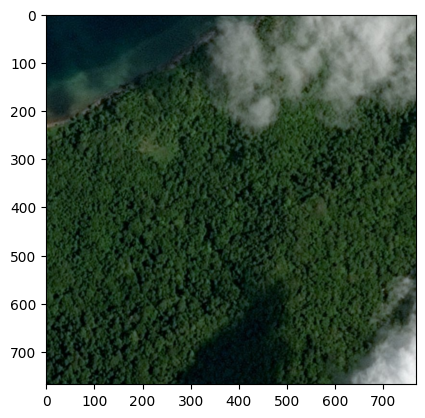

detected:	 FOREST



test_image_04.jpg


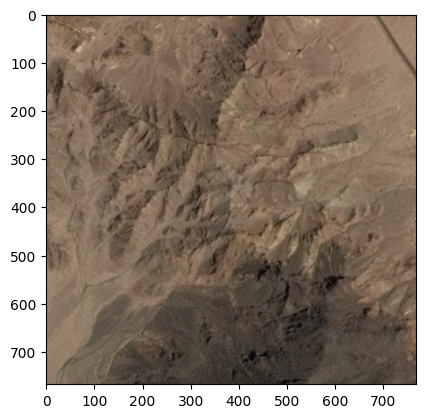

detected:	 DESERT



test_image_05.jpg


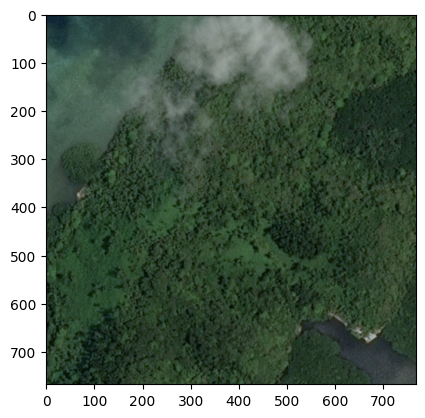

detected:	 FOREST



test_image_06.jpg


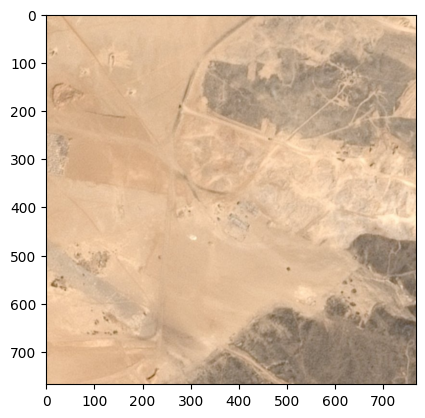

detected:	 DESERT



test_image_07.jpg


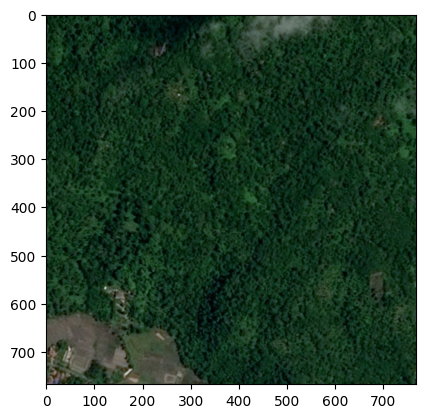

detected:	 FOREST



test_image_08.jpg


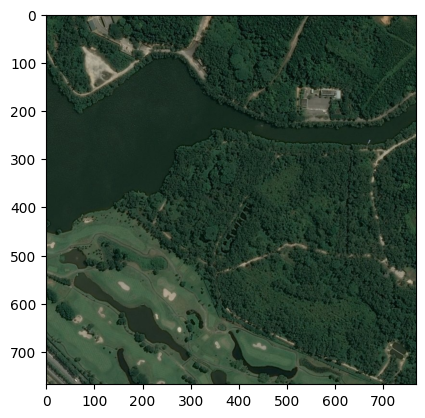

detected:	 FOREST



test_image_09.jpg


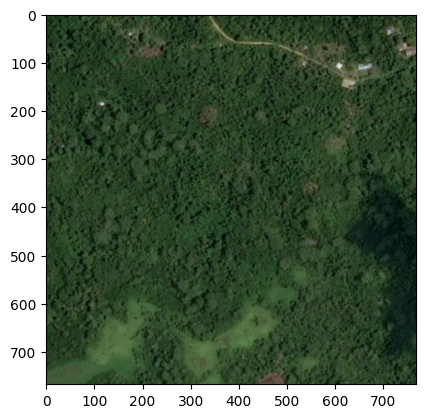

detected:	 FOREST



test_image_10.jpg


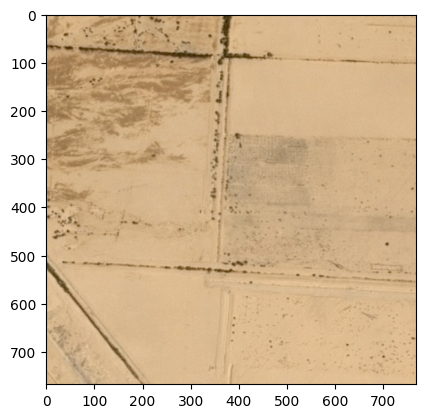

detected:	 DESERT



test_image_11.jpg


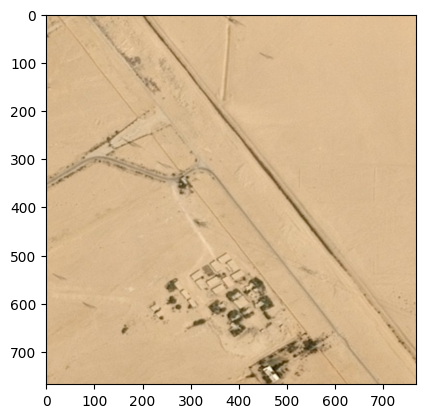

detected:	 DESERT



test_image_12.jpg


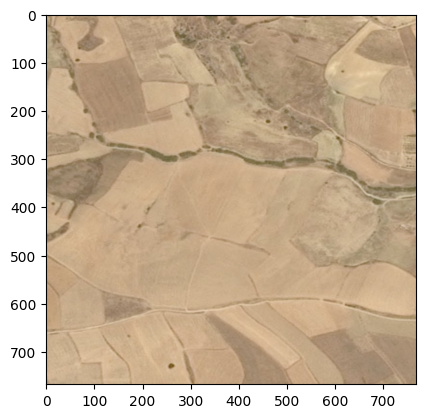

detected:	 DESERT



test_image_13.jpg


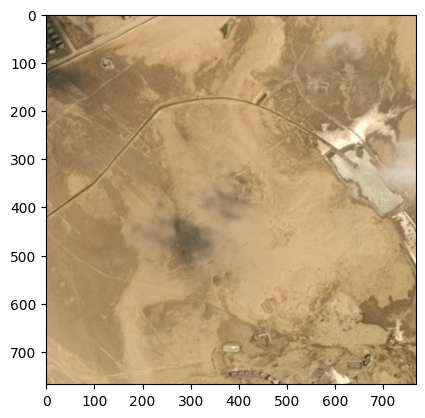

detected:	 DESERT



test_image_14.jpg


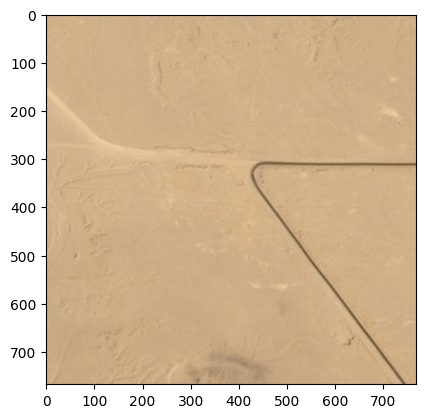

detected:	 DESERT



test_image_15.jpg


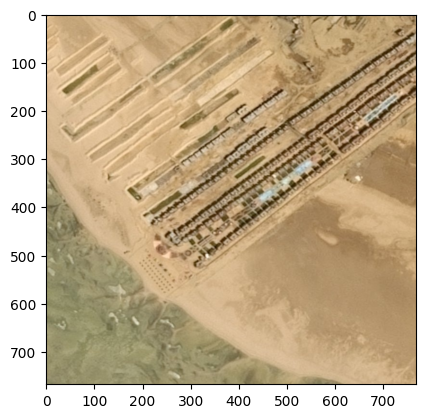

detected:	 DESERT



test_image_16.jpg


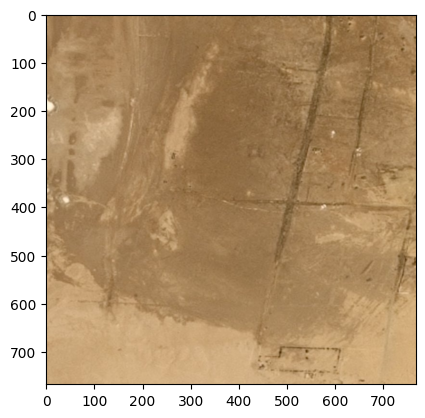

detected:	 DESERT





In [8]:
# Ваш код
import numpy as np
import pylab
import cv2
import os

def forest_detector_9000(img):
    # считаем средние значения по каналам
    blue_mean = img[:,:,0].mean()
    green_mean = img[:,:,1].mean()
    red_mean = img[:,:,2].mean()
    if green_mean > red_mean and green_mean > blue_mean:
        # если зеленый канал ярче всех, значит, лес
        return "FOREST"
    else:
        return "DESERT"

for elm in os.listdir("desert_forest"):
    img = cv2.imread(f'desert_forest/{elm}')
    if img is not None:
        print(elm)
        pylab.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # cv2 зачем-то реверсит красные и синие пиксели...
        pylab.show()
        print("detected:\t",forest_detector_9000(img))
        print("\n=================================")
        print("\n")

# Задача №2 - Реализовать Image-blending на основе сшивки по градиентам

Задача - взять фото двух лиц : ваше и друга, с помощью метода Poisson image editing совместить глаза, нос и рот с первого изображения со вторым. Суть в том, что при использовании такого метода границы совмещенного изображения не видны.

Статья, где описан метод  

Patrick Pérez, Michel Gangnet, and Andrew Blake. 2003. Poisson image editing. ACM Trans. Graph. 22, 3 (July 2003), 313–318. https://doi.org/10.1145/882262.882269

Пример такого совмещения:

<img src="../homework/blending/blending.png" alt="Drawing" style="width: 700px;"/>


In [88]:
def normalize_image_slice(img):
    return (img - img.min())/(img.max() - img.min())

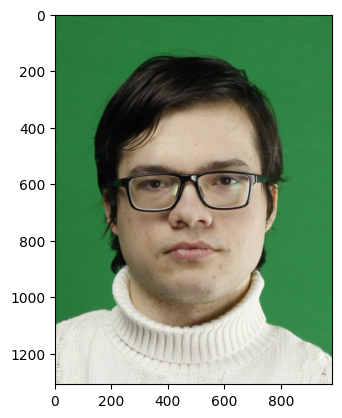

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


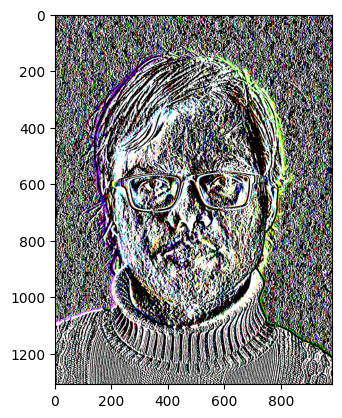

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


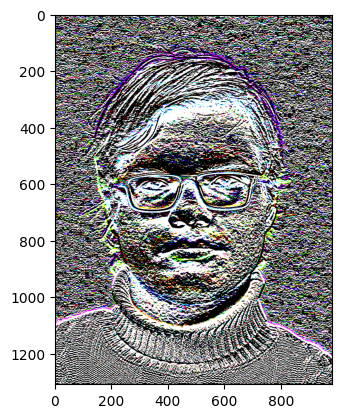

In [99]:
# Ваш код
img = cv2.imread('blending/im1.jpg')
drv_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
drv_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
pylab.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
pylab.show()
pylab.imshow(drv_x)
pylab.show()
pylab.imshow(drv_y)
pylab.show()

In [100]:
# восстановление изображения
restored_image = np.zeros(img.shape)
# задание граничных условий
restored_image[:,0] = img[:,0]
restored_image[:,-1] = img[:,-1]
restored_image[0,:] = img[0,:]
restored_image[-1,:] = img[-1,:]
# рассчет изображения на основе граничных условий и градиентов
for i in range(1,img.shape[0] - 1):
    for j in range(1, img.shape[1] - 1):
        restored_image[i,j,0] = restored_image[i,j-1,0] + drv_x[i,j,0]
        restored_image[i,j,0] = restored_image[i-1,j,0] + drv_y[i,j,0]

for i in range(1,img.shape[0] - 1):
    for j in range(1, img.shape[1] - 1):
        restored_image[i,j,1] = restored_image[i,j-1,1] + drv_x[i,j, 1]
        restored_image[i,j,1] = restored_image[i-1,j,1] + drv_y[i,j, 1]

for i in range(1,img.shape[0] - 1):
    for j in range(1, img.shape[1] - 1):
        restored_image[i,j,2] = restored_image[i,j-1,2] + drv_x[i,j, 2]
        restored_image[i,j,2] = restored_image[i-1,j,2] + drv_y[i,j, 2]
# нормализация и исправление цветов
restored_image[:,:,2] = normalize_image_slice(restored_image[:,:,0])
restored_image[:,:,1] = normalize_image_slice(restored_image[:,:,1])
restored_image[:,:,0] = normalize_image_slice(restored_image[:,:,2])

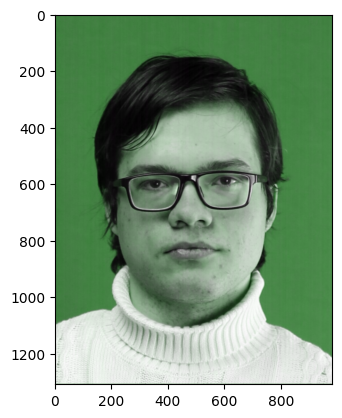

In [101]:
pylab.imshow(restored_image)
pylab.show()

In [5]:
import pylab

# Задача №3 - Найди клетки

Даны снимки раковых клеток. Существует задача - определить стадию рака клетки по такому изображению. Для того, чтобы подойти к решению классификации рака клетки, необходимо сначала подготовить данные.

Исходные изображения в реальных задачах могут быть очень большого размера (более 20000 px). Однако из визуального анализа можно заметить, что большая часть этих снимков пустая и не несет в себе полезную информацию.

Ваша задача выделить небольшие ячейки изображений из исходного так, чтобы на ячейках было только изображение клетки.

Пример исходного изображения и нарезанных ячеек клетки.
<img src="../img/cell_example.png" alt="Drawing" style="width: 500px;"/>

В качестве аргументов у функции будут значения:
1. исходное изображние;
2. размер ячейки;
3. количество ячеек.

__Доп вопрос__ - как можно выяснить какие нужны значения аргументов, чтобы они подходили для большинства исходных снимков?

In [ ]:
# Ваш код